## import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
sys.path
# Add src to path
sys.path.append('../src')
# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Stratified Sampling

In [2]:
import pandas as pd

def create_stratified_sample(input_file, sample_size, stratify_col='Product', random_state=42):
    # Load the data
    df = pd.read_csv(r"C:\Users\hakimam\Desktop\pproject\test5\data\processed\filtered_feedback.csv")
    
    # Calculate fraction per group
    total_rows = len(df)
    frac = sample_size / total_rows
    
    # Stratified sampling
    df_sampled = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(frac=frac, random_state=random_state)
    ).reset_index(drop=True)
    
    return df_sampled

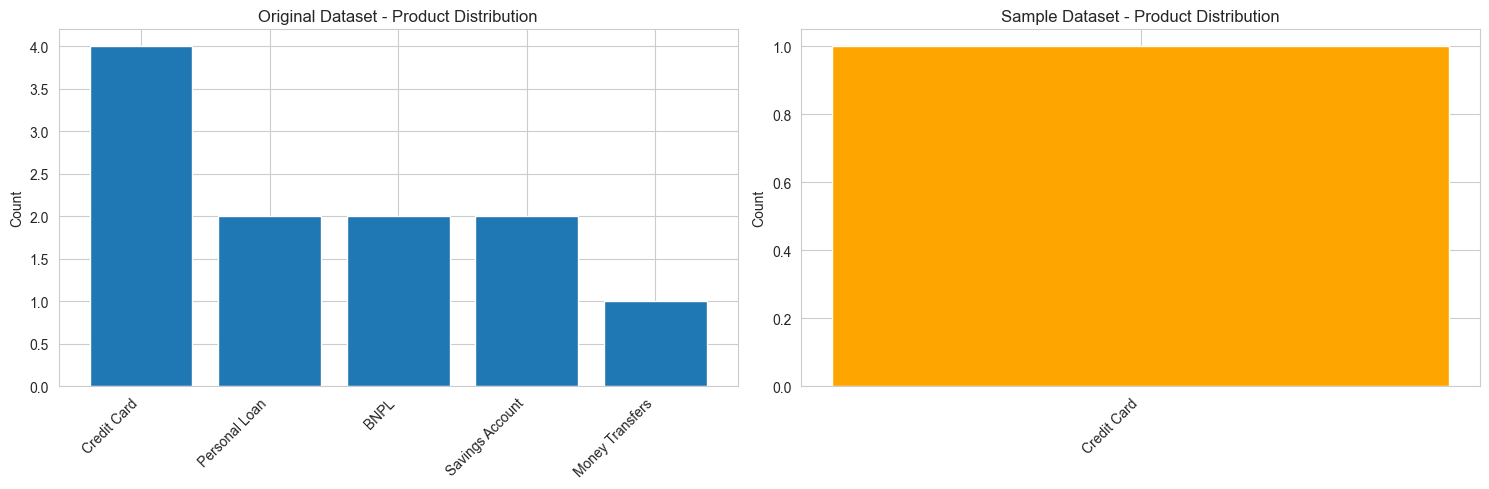


Proportional representation check:

Original proportions (%):
product
Credit Card        36.36
Personal Loan      18.18
BNPL               18.18
Savings Account    18.18
Money Transfers     9.09
Name: proportion, dtype: float64

Sample proportions (%):
(1, 6)
   feedback_id      product  \
5            7  Credit Card   

                                   customer_feedback  word_count  \
5  My credit card statement is unclear. I need he...          12   

                                  processed_feedback  \
5  my credit card statement is unclear i need hel...   

                                 normalized_feedback  
5  credit card statement unclear need help unders...  


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load original dataset
original_df = pd.read_csv(r"C:\Users\hakimam\Desktop\pproject\test5\data\processed\filtered_feedback.csv")

# If sample_df already exists from previous stratified sampling, keep it
# Otherwise, create it using your create_stratified_sample function

# Count product occurrences
import pandas as pd
sample_df = original_df.sample(
    frac=0.1,        # 10% sample
    random_state=42
)


original_counts = original_df['product'].value_counts()
sample_counts = sample_df['product'].value_counts()


# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Original dataset
axes[0].bar(range(len(original_counts)), original_counts.values)
axes[0].set_xticks(range(len(original_counts)))
axes[0].set_xticklabels(original_counts.index, rotation=45, ha='right')
axes[0].set_title('Original Dataset - Product Distribution')
axes[0].set_ylabel('Count')

# Sample dataset
axes[1].bar(range(len(sample_counts)), sample_counts.values, color='orange')
axes[1].set_xticks(range(len(sample_counts)))
axes[1].set_xticklabels(sample_counts.index, rotation=45, ha='right')
axes[1].set_title('Sample Dataset - Product Distribution')
axes[1].set_ylabel('Count')

plt.tight_layout()

# Save figure
plt.show()

# Proportional representation check
print("\nProportional representation check:")

print("\nOriginal proportions (%):")
print((original_df['product'].value_counts(normalize=True) * 100).round(2))

print("\nSample proportions (%):")
print(sample_df.shape)
print(sample_df.head())


In [7]:
def create_text_chunks(df, text_column, chunk_size=10, chunk_overlap=5):
    chunks = []
    chunk_id = 0

    for _, row in df.iterrows():
        words = row[text_column].split()
        start = 0
        while start < len(words):
            end = start + chunk_size
            chunk_words = words[start:end]
            chunks.append({
                "chunk_id": chunk_id,
                "text": " ".join(chunk_words)
            })
            chunk_id += 1
            start = end - chunk_overlap

    import pandas as pd
    return pd.DataFrame(chunks)


def analyze_chunks(chunks_df):
    return {
        "total_chunks": len(chunks_df),
        "avg_length": chunks_df["text"].str.split().str.len().mean()
    }


def save_chunks(chunks_df, path):
    chunks_df.to_csv(path, index=False)


In [8]:
import pandas as pd

# Example dataframe
sample_df = pd.DataFrame({
    "customer_feedback": [
        "This product is great and works perfectly",
        "I had some issues with the delivery but overall happy"
    ]
})

chunks_data = create_text_chunks(
    df=sample_df,
    text_column="customer_feedback",
    chunk_size=5,
    chunk_overlap=2
)

print(chunks_data)


   chunk_id                          text
0         0     This product is great and
1         1     great and works perfectly
2         2                     perfectly
3         3        I had some issues with
4         4  issues with the delivery but
5         5    delivery but overall happy
6         6                         happy


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Chunk length distribution
axes[0].hist(chunk_lengths, bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(np.mean(chunk_lengths), color='red', linestyle='--', 
                label=f'Mean: {np.mean(chunk_lengths):.0f}')
axes[0].axvline(np.median(chunk_lengths), color='green', linestyle='--', 
                label=f'Median: {np.median(chunk_lengths):.0f}')
axes[0].set_title("Chunk Length Distribution")
axes[0].set_xlabel("Words per Chunk")
axes[0].set_ylabel("Frequency")
axes[0].legend()

plt.show()


NameError: name 'chunk_lengths' is not defined

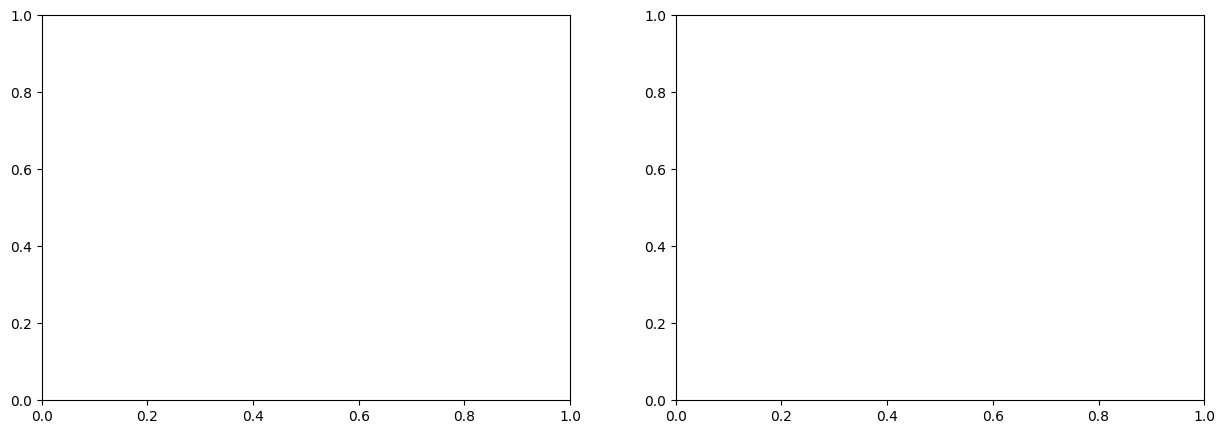

In [9]:
# Visualize chunk statistics
import pandas as pd
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Chunk length distribution
axes[0].hist(chunk_lengths, bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(np.mean(chunk_lengths), color='red', linestyle='--', label=f'Mean: {np.mean(chunk_lengths):.0f}')
axes[0].axvline(np.median(chunk_lengths), color='green', linestyle='--', label=f'Median: {np.median(chunk_lengths):.0f}')
axes[0].set_xlabel('Chunk Length (characters)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Chunk Lengths')
axes[0].legend()

# Chunks per complaint distribution
chunks_counts = list(chunks_per_feedback.values())
axes[1].hist(chunks_counts, bins=range(1, max(chunks_counts)+2), edgecolor='black', alpha=0.7, color='orange')
axes[1].axvline(np.mean(chunks_counts), color='red', linestyle='--', label=f'Mean: {np.mean(chunks_counts):.2f}')
axes[1].set_xlabel('Chunks per feedback')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Chunks per feedback')
axes[1].legend()

plt.tight_layout()
plt.savefig('../report/images/chunking_analysis.png', dpi=300, bbox_inches='tight')

In [ ]:
from embedding import generate_embeddings, analyze_embeddings, save_embeddings

# Generate embeddings
embeddings, chunks_df = generate_embeddings(
    chunks_file=r"C:\Users\hakimam\Desktop\pproject\test5\data\processed\chunck_sample.csv",
    model_name="sentence-transformers/all-MiniLM-L6-v2",
    batch_size=32
)

# Analyze embeddings
analyze_embeddings(embeddings)

# Save embeddings
save_embeddings(embeddings, chunks_df, r"C:\Users\hakimam\Desktop\pproject\test5\data\processed\sample_embedding.npy")

In [ ]:
# Visualize embedding statistics
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Embedding value distribution
axes[0].hist(embeddings.flatten(), bins=100, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Embedding Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Embedding Values')
axes[0].set_yscale('log')

# Embedding norms
norms = np.linalg.norm(embeddings, axis=1)
axes[1].hist(norms, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].axvline(np.mean(norms), color='red', linestyle='--', label=f'Mean: {np.mean(norms):.4f}')
axes[1].set_xlabel('L2 Norm')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Embedding Norms')
axes[1].legend()

plt.tight_layout()
plt.savefig('../report/images/embedding_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## FAISS Vector Store

In [ ]:
from vector_store_builder import build_vector_store, test_vector_store

# Build vector store
store = build_vector_store(
    embeddings_file="../data/processed/sample_embeddings.npy",
    metadata_file="../data/processed/sample_chunks.csv",
    output_dir="../vector_store/faiss_index",
    index_type="flat"
)

# Test vector store
test_vector_store(store)

In [ ]:
from vector_store_builder import FAISSVectorStore

# Load the vector store
store = FAISSVectorStore.load("../vector_store/faiss_index")
store.load_model()

# Custom query
query = "I want to dispute fraudulent charges on my account"
results = store.query(query, k=5)

print(f"Query: '{query}'\n")
print("="*80)

for i, result in enumerate(results, 1):
    print(f"\nResult {i}:")
    print(f"  Similarity: {result['similarity']:.4f}")
    print(f"  Product: {result.get('product_category', 'N/A')}")
    print(f"  Issue: {result.get('issue', 'N/A')}")
    print(f"  Company: {result.get('company', 'N/A')}")
    print(f"  State: {result.get('state', 'N/A')}")
    print(f"  Text: {result.get('text', '')[:300]}...")